In [0]:
#这个文件是用strength来预测distribute的  用flipped 和 nonflipped数据来跑模型
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential 
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras import Input,layers
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# nonflipped全保留数据 转化成 strength

In [0]:
#将 24 个 150,30,116 穿连到一起 变成3600,30,116   数据较小  不需要保存
# num = np.load('/content/drive/My Drive/strength/nonflipped/all/1.npy')
# num = np.reshape(num,(150,30,116))
# for i in range(2,25):
#   Num = np.load('/content/drive/My Drive/strength/nonflipped/all/' + str(i) + '.npy')
#   Num = np.reshape(Num,(150,30,116)) 
#   num = np.concatenate((num,Num),axis = 0)

# print(num.shape)   #(3600, 30, 116)

(3600, 30, 116)


In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/nonflipped/all/' + str(tmp)+ '.npy')
A = np.reshape(A,(150,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/nonflipped/all/' + str(i)+ '.npy')
  a = np.reshape(a,(150,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 3)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/nonflipped/all/' + str(tmp)+ '.npy')
C = np.reshape(C,(150,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/nonflipped/all/' + str(i)+ '.npy')
  c = np.reshape(c,(150,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 3)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116)
(2700, 3)
(900, 30, 116)
(900, 3)


In [0]:
train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(2700,30,116,1))
test_data = np.reshape(test_data,(900,30,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 30, 116, 1)
(2700, 3)
(900, 30, 116, 1)
(900, 3)


In [0]:
def Model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform', input_shape=(30, 116, 1), padding = 'same'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(256, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))

  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(3, activation='softmax'))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.0001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:
num_epochs = 50
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 30, 116, 32)       288       
_________________________________________________________________
batch_normalization_66 (Batc (None, 30, 116, 32)       128       
_________________________________________________________________
dropout_66 (Dropout)         (None, 30, 116, 32)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 111360)            0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               14254208  
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 387       
Total params: 14,255,011
Trainable params: 14,254,947
Non-trainable params: 64
________________________________________

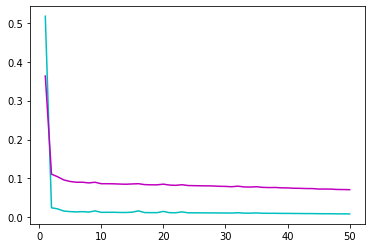

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

array([-1.39926496, -2.44715001, -3.75848858])

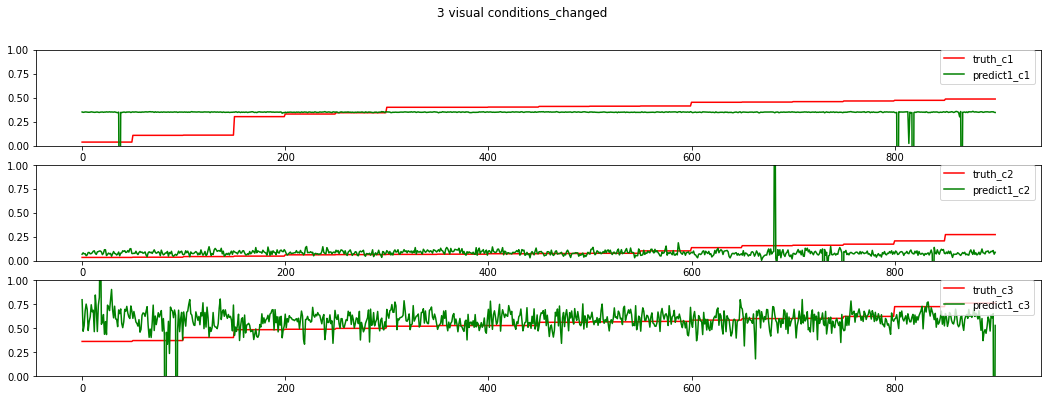

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100
comparision1 = (model.predict(test_data))
Test_label = test_label
# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(900)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.set_ylim([0,1])
predict_c2.set_ylim([0,1])
predict_c3.set_ylim([0,1])
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')

# nonflipped保留最强30%数据 转化成 strength

# flipped全保留数据 转化成 strength

In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/flipped/all/three/' + str(tmp)+ '.npy')
A = np.reshape(A,(150,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/flipped/all/three/' + str(i)+ '.npy')
  a = np.reshape(a,(150,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 3)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/flipped/all/three/' + str(tmp)+ '.npy')
C = np.reshape(C,(150,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/flipped/all/three/' + str(i)+ '.npy')
  c = np.reshape(c,(150,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 3)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116)
(2700, 3)
(900, 30, 116)
(900, 3)


In [0]:
train_data = A
train_label = B
test_data = C
test_label = D

# train_data = np.reshape(train_data,(2700,30,116,1))
# test_data = np.reshape(test_data,(900,30,116,1)) 

train_data = np.reshape(train_data,(2700,3480))
test_data = np.reshape(test_data,(900,3480)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 3480)
(2700, 3)
(900, 3480)
(900, 3)


In [0]:
def Model():
  # input_shape=(116,30)
  model = Sequential()
  

  # model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform',input_shape=(3480,)))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(3, activation='softmax'))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.0001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:
# def Model():
#   model = Sequential()
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform', input_shape=(30, 116, 1)))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(256, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))

#   model.add(Flatten())
#   # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#   # model.add(Dense(3, activation='softmax'))
#   model.add(Dense(3))
#   model.summary()
#   from keras.optimizers import RMSprop,Adam
#   model.compile(optimizer = Adam(lr=0.0001),
#                 loss = 'mean_squared_error',
#                 metrics = ['mae'])
#   return model



In [0]:
num_epochs = 100
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              3564544   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 387       
Total params: 4,253,955
Trainable params: 4,253,955
Non-trainable params: 0
_________________________________________________________________

Epoch 1/100
2700/2700 [=====

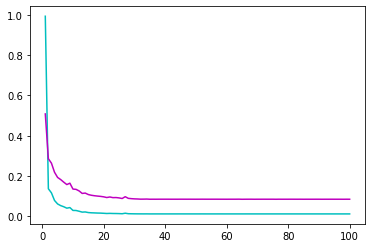

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

array([-0.01739316, -0.03753368, -0.01390719])

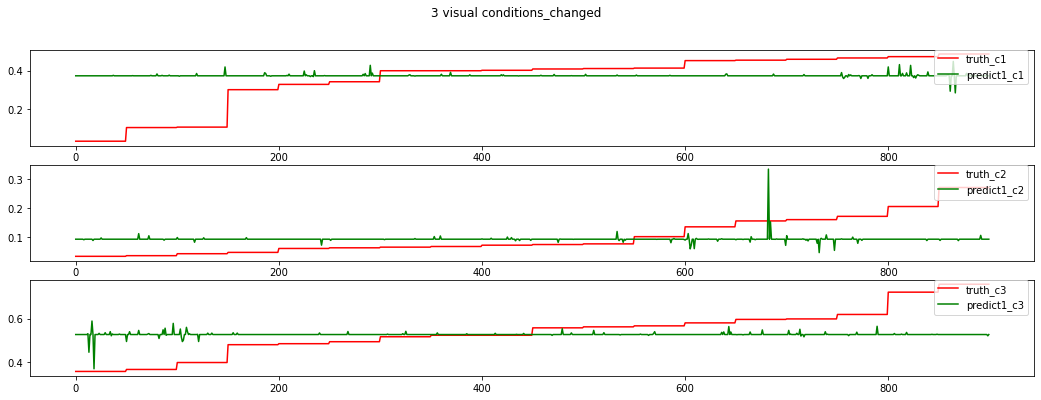

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100
comparision1 = (model.predict(test_data))
Test_label = test_label
# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(900)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')

# nonflipped保留全部数据strength 并且打平30*116

In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(tmp)+ '.npy')
A = np.reshape(A,(150,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(i)+ '.npy')
  a = np.reshape(a,(150,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116)


# tmp = order[0]
# B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
# for i in order[1:18]: 
#   b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
#   B = np.concatenate((B,b), axis = 0)
# print(B.shape)
# # 前十八个 病人数据做训练label(2700, 3)

tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_' + str(tmp)+ '.npy')
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_' + str(i)+ '.npy')
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 3)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(tmp)+ '.npy')
C = np.reshape(C,(150,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/nonflipped/all/three/' + str(i)+ '.npy')
  c = np.reshape(c,(150,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116)

# tmp = order[18]
# D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
# for i in order[19:]: 
#   d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
#   D = np.concatenate((D,d), axis = 0)
# print(D.shape)
# # 后六个人 病人数据做测试label(900, 3)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_' + str(tmp)+ '.npy')
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_' + str(i)+ '.npy')
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 3)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116)
(2700, 4, 3)
(900, 30, 116)
(900, 4, 3)


In [0]:
train_data = A
train_label = B
test_data = C
test_label = D

# train_data = np.reshape(train_data,(2700,30,116,1))
# test_data = np.reshape(test_data,(900,30,116,1)) 

train_data = np.reshape(train_data,(2700,3480))
test_data = np.reshape(test_data,(900,3480)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 3480)
(2700, 4, 3)
(900, 3480)
(900, 4, 3)


In [0]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(3480,))
  x = layers.Dense(1024, activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.Dense(512, activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.Dense(256, activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.Dense(128, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(32, activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.Dense(16, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y1 = layers.Dense(3,activation='sigmoid', name = 'y1')(x)
  y2 = layers.Dense(3,activation='sigmoid', name = 'y2')(x)
  y3 = layers.Dense(3,activation='sigmoid', name = 'y3')(x)
  y4 = layers.Dense(3,activation='sigmoid', name = 'y4')(x)
  

  # This creates a model that includes
  model = Model(inputs=x_input, outputs=[y1,y2,y3,y4
                                        #  ,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16
                                        #  ,y17,y18,y19,y20,y21,y22,y23,y24,y25
                                         ])
  model.summary() 
  model.compile(optimizer = Adam(lr=0.0003),
                loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy'
                ],
                metrics=['accuracy'])
  return model 

In [0]:
# def Model():
#   # input_shape=(116,30)
#   model = Sequential()
  

#   # model.add(Flatten())
#   # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform',input_shape=(3480,)))
#   model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#   model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#   # model.add(Dense(3, activation='softmax'))
#   model.add(Dense(3,activation='sigmoid')
#   model.summary()
#   from keras.optimizers import RMSprop,Adam
#   model.compile(optimizer = Adam(lr=0.0003),
#                 loss = 'mean_squared_error',
#                 metrics = ['mae'])
#   return model



In [0]:
# num_epochs = 500
# batchsize = 50
# model = Model()
# history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


In [0]:
num_epochs = 500
batchsize = 50
model = Functional_model()
history = model.fit(train_data, [train_label[:,0],train_label[:,1],
                                 train_label[:,2],train_label[:,3]], epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 3480)         0                                            
__________________________________________________________________________________________________
dense_54 (Dense)                (None, 1024)         3564544     input_4[0][0]                    
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 512)          524800      dense_54[0][0]                   
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 256)          131328      dense_55[0][0]                   
____________________________________________________________________________________________

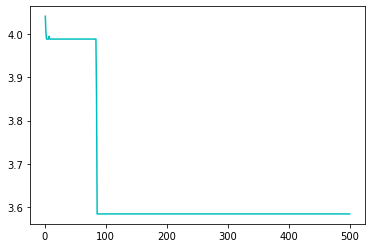

In [0]:
mse_history = history.history['loss']
# mae_history = history.history['y3_accuracy']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
# plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

In [0]:
test = model.evaluate(test_data, [test_label[:,0],test_label[:,1],test_label[:,2],test_label[:,3]
                                  # ,test_label[:,4] ,test_label[:,5],test_label[:,6],test_label[:,7],
                                #  test_label[:,8],test_label[:,9],test_label[:,10],test_label[:,11],test_label[:,12],test_label[:,13],test_label[:,14],test_label[:,15]
                                #   ,test_label[:,16],test_label[:,17],test_label[:,18],test_label[:,19],test_label[:,20],test_label[:,21],test_label[:,22],test_label[:,23],
                                #  test_label[:,24]
                                  ], verbose=0)
# print(test)
average = 5
mean = np.mean(test[average:])
print(len(test[average:]))

print(mean)

4
0.3750000037252903


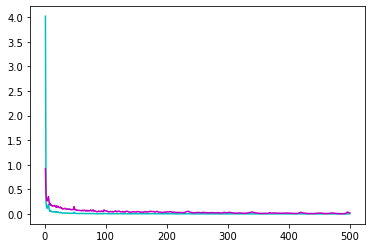

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

In [0]:
tmp = train_data[:1000]
Tmp = train_label[:1000]

array([-0.47498986, -0.8550067 , -0.94826156])

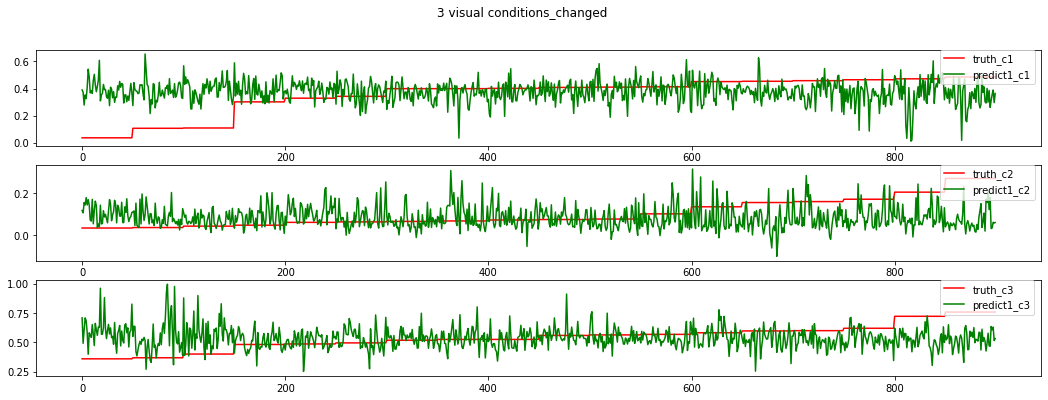

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100

comparision1 = (model.predict(test_data))
Test_label = test_label

# comparision1 = (model.predict(tmp))
# Test_label = Tmp

# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(900)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')

# Nonflipped 4种全部

In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/nonflipped/all/four/' + str(tmp)+ '.npy')
A = np.reshape(A,(200,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/nonflipped/all/four/' + str(i)+ '.npy')
  a = np.reshape(a,(200,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(3600, 30, 116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(tmp)+ '.npy')
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(i)+ '.npy')
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(3600, 3)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/nonflipped/all/four/' + str(tmp)+ '.npy')
C = np.reshape(C,(200,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/nonflipped/all/four/' + str(i)+ '.npy')
  c = np.reshape(c,(200,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(1200, 30, 116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(tmp)+ '.npy')
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(i)+ '.npy')
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(1200, 3)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(3600, 30, 116)
(3600, 3)
(1200, 30, 116)
(1200, 3)


In [0]:
train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,1))
test_data = np.reshape(test_data,(1200,30,116,1)) 

train_data,train_label = shuffle((train_data,train_label), random_state= 10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(3600, 30, 116, 1)
(3600, 3)
(1200, 30, 116, 1)
(1200, 3)


In [0]:
def Model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform', input_shape=(30, 116, 1)))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # model.add(Conv2D(256, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  # model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))

  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(3, activation='softmax'))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.0001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:
num_epochs = 50
batchsize = 12
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 29, 113, 32)       288       
_________________________________________________________________
batch_normalization_63 (Batc (None, 29, 113, 32)       128       
_________________________________________________________________
dropout_63 (Dropout)         (None, 29, 113, 32)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 110, 64)       16448     
_________________________________________________________________
batch_normalization_64 (Batc (None, 28, 110, 64)       256       
_________________________________________________________________
dropout_64 (Dropout)         (None, 28, 110, 64)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 27, 107, 128)     

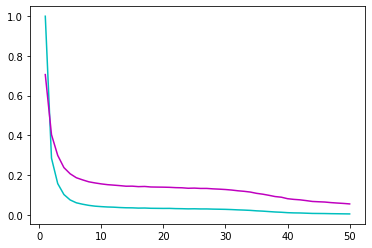

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

array([-0.63693396, -0.93233456, -0.64925142])

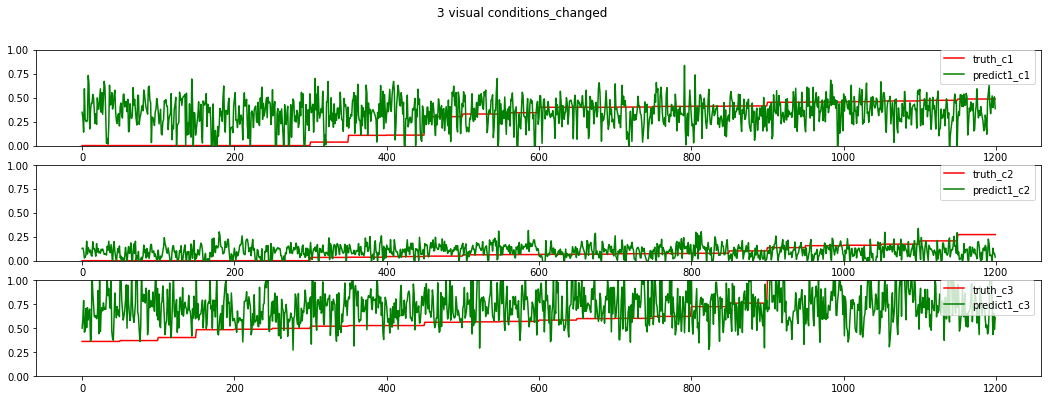

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100
comparision1 = (model.predict(test_data))
Test_label = test_label
# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(1200)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
predict_c1.set_ylim([0,1])
predict_c2.set_ylim([0,1])
predict_c3.set_ylim([0,1])
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.set_ylim([0,1])
predict_c2.set_ylim([0,1])
predict_c3.set_ylim([0,1])
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')

# flipped 4种0.3

In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/strength/flipped/keep_30/four' + str(tmp)+ '.npy')
A = np.reshape(A,(200,30,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/strength/flipped/keep_30/four' + str(i)+ '.npy')
  a = np.reshape(a,(200,30,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(3600, 30, 116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(tmp)+ '.npy')
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(i)+ '.npy')
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(3600, 3)

tmp = order[18]
C = np.load('/content/drive/My Drive/strength/flipped/keep_30/four' + str(tmp)+ '.npy')
C = np.reshape(C,(200,30,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/strength/flipped/keep_30/four' + str(i)+ '.npy')
  c = np.reshape(c,(200,30,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(1200, 30, 116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(tmp)+ '.npy')
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_with_control_' + str(i)+ '.npy')
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(1200, 3)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

In [0]:
train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,1))
test_data = np.reshape(test_data,(1200,30,116,1)) 

train_data,train_label = shuffle((train_data,train_label), random_state= 10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

In [0]:
def Model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform', input_shape=(30, 116, 1)))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(256, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(128, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(64, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv2D(32, kernel_size=(2, 4), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(3, activation='softmax'))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.0001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:
num_epochs = 50
batchsize = 12
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100
comparision1 = (model.predict(test_data))
Test_label = test_label
# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(1200)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')

# 把30赫兹频率变成6个 

In [0]:
def from_30_to_6(Num):
  data = Num[:]
  New_6 = []
  for i in range(150):

  # i = 0
    delta = (data[i,0] + data[i,1] + data[i,2])/3 
    delta = np.reshape(delta, (1,116,116))
    theta = (data[i,3] + data[i,4] + data[i,5] + data[i,6])/4 
    theta = np.reshape(theta, (1,116,116))
    alpha_low = (data[i,7] + data[i,8] + data[i,9])/3  
    alpha_low = np.reshape(alpha_low, (1,116,116))
    alpha_high = (data[i,10] + data[i,11] + data[i,12])/3  
    alpha_high = np.reshape(alpha_high, (1,116,116))
    beta_1 = (data[i,13] + data[i,14] + data[i,15] + data[i,16] + data[i,17] + data[i,18] + data[i,19] + data[i,20])/8 
    beta_1 = np.reshape(beta_1, (1,116,116))
    beta_2 = (data[i,21] + data[i,22] + data[i,23] + data[i,24] + data[i,25] + data[i,26] + data[i,27] + data[i,28] + data[i,29])/9 
    beta_2 = np.reshape(beta_2, (1,116,116))
    new_6 = np.concatenate((delta,theta,alpha_low,alpha_high,beta_1,beta_2), axis = 0) 
    New_6.append(new_6)
    new_6 = 0

  New_6  = np.array(New_6)
  return New_6

In [0]:
for i in range(1,25):
  Num = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/115_30_116_116_' + str(i) + '.npy')
  tmp = from_30_to_6(Num)
  np.save('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i)+ '.npy', tmp)
#这里保存的是没有flipped的数据  按24个病人来分的

In [0]:
aaa = np.load('/content/drive/My Drive/Newdata/changed/allpre.npy')
bbb = np.load('/content/drive/My Drive/Newdata/changed/allpost.npy')
ccc = np.load('/content/drive/My Drive/Newdata/changed/allfu.npy')

In [0]:
for i in range(24):
# i = 1

  Num = np.concatenate((aaa[i*50:(i+1)*50],bbb[i*50:(i+1)*50],ccc[i*50:(i+1)*50]), axis = 0)
  tmp = from_30_to_6(Num)
  np.save('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i+1)+ '_flipped.npy', tmp)
# 这里保存的是 flipped后的数据   按24个病人来分的
  # print(i)

# 载入非flipped数据


In [0]:
train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original.npy')
train_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3.npy')
test_data =  np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original.npy')
test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3.npy')

# train_data = A
# train_label = B
# test_data = C
# test_label = D

train_data = np.reshape(train_data,(2700,6,116,116,1))
test_data = np.reshape(test_data,(900,6,116,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 6, 116, 116, 1)
(2700, 3)
(900, 6, 116, 116, 1)
(900, 3)


# 载入flipped数据

In [0]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(tmp)+ '_flipped.npy')
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i)+ '_flipped.npy')
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116, 116)


# tmp = order[0]
# B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
# for i in order[1:18]: 
#   b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
#   B = np.concatenate((B,b), axis = 0)
# print(B.shape)
# # 前十八个 病人数据做训练label(2700, 21, 21)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(tmp)+ '_flipped.npy')
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i)+ '_flipped.npy')
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116, 116)

# tmp = order[18]
# D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(tmp)+ '.npy')
# for i in order[19:]: 
#   d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i)+ '.npy')
#   D = np.concatenate((D,d), axis = 0)
# print(D.shape)
# # 后六个人 病人数据做测试label(900, 21, 21)

np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_flipped', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_flipped', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 6, 116, 116)
(900, 6, 116, 116)


In [0]:
# train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_flipped.npy')
train_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3.npy')
# test_data =  np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_flipped.npy')
test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3.npy')

train_data = A
# train_label = B
test_data = C
# test_label = D

train_data = np.reshape(train_data,(2700,6,116,116,1))
test_data = np.reshape(test_data,(900,6,116,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 6, 116, 116, 1)
(2700, 3)
(900, 6, 116, 116, 1)
(900, 3)


# 模型部分

In [0]:
def Model():
  model = Sequential()
  model.add(Conv3D(128, kernel_size=(1, 6, 6), activation='relu', kernel_initializer='he_uniform', input_shape=(6,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv3D(64, kernel_size=(1, 6, 6), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  # model.add(Conv3D(30, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(40, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(50, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(60, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(70, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(80, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(90, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(100, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(90, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(80, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(70, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(60, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(50, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(40, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(30, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(20, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(10, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # # model.add(Dropout(0.5))
  # model.add(Conv3D(1, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # # model.add(MaxPooling3D(pool_size=(1, 1, 1)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1028, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(3, activation='softmax'))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.0001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:

# data = np.load('/content/drive/My Drive/Newdata/shuffle_originalin3600.npy')
# label =  np.load('/content/drive/My Drive/Newdata/shuffle_originalout3600.npy')
# k = 5
# num_val_samples = len(data)//k
# # for i in range(k):
# i = 2
# print('processing fold #', i)
# test_data = data[i * num_val_samples: (i + 1) * num_val_samples]
# test_label = label[i * num_val_samples: (i + 1) * num_val_samples]
# train_data = np.concatenate([data[:i * num_val_samples],data[(i + 1) * num_val_samples:]], axis=0)
# train_label = np.concatenate([label[:i * num_val_samples],label[(i + 1) * num_val_samples:]], axis=0)
# np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_trainin_original3600', train_data)
# # np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_trainout_original3600', train_label)
# # np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_testin_original3600', test_data)
# # np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_testout_original3600', test_label)



# 跑模型

In [0]:
num_epochs = 50
batchsize = 12
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 6, 111, 111, 128)  4736      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 55, 55, 128)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 55, 55, 128)    512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 55, 55, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 50, 50, 64)     294976    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 25, 25, 64)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 25, 25, 64)    

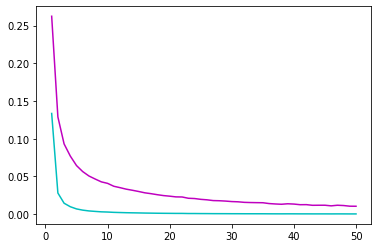

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

array([-1.63628163, -0.43724307, -1.03029477])

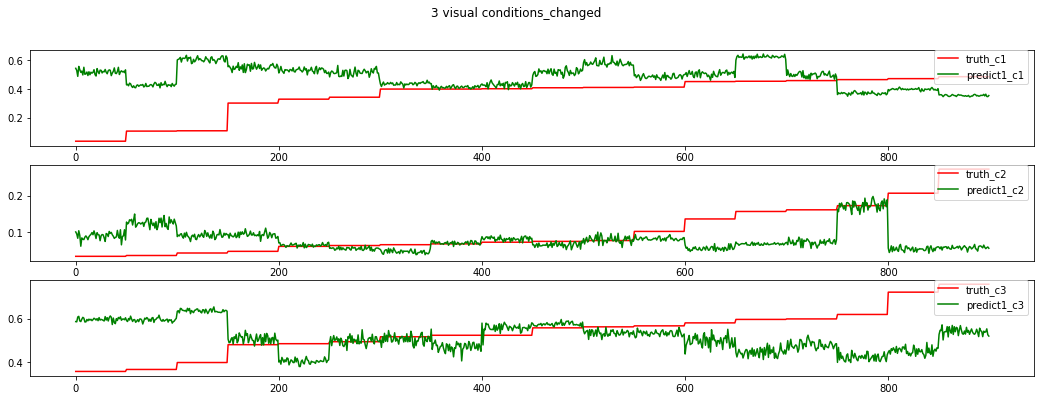

In [0]:

# comparision1 = (model.predict(test_data))*100
# Test_label = test_label*100
comparision1 = (model.predict(test_data))
Test_label = test_label
# comparision1 , Test_label = shuffle(comparision1, Test_label)
x_data = range(900)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1[np.argsort(y_data_c1)] , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2[np.argsort(y_data_c2)] , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3[np.argsort(y_data_c3)] , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1[np.argsort(y_data_c1)] , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2[np.argsort(y_data_c2)] , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3[np.argsort(y_data_c3)] , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')